In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [11]:
# word_path = "../processed/train/evaluated/paraphrase_replaced_adjectives_mistralai_51_similarity_21_02_2024.csv"
dipper_path = path = "../processed/train/evaluated/mistralai-Mistral-7B-Instruct-v0_2_4_similarity_evaluated_01_03_2024.csv"

In [12]:
# word_df = pd.read_csv(word_path)
dipper_df = pd.read_csv(dipper_path)

In [13]:
no_paraphrases = 3
sim_columns = [f"pp-sim-{i}" for i in range(1, no_paraphrases+1)]
# word_similarities = word_df[sim_columns]
dipper_similarities = dipper_df[sim_columns]

In [14]:
# np_word = word_similarities.to_numpy()
np_dipper = dipper_similarities.to_numpy()

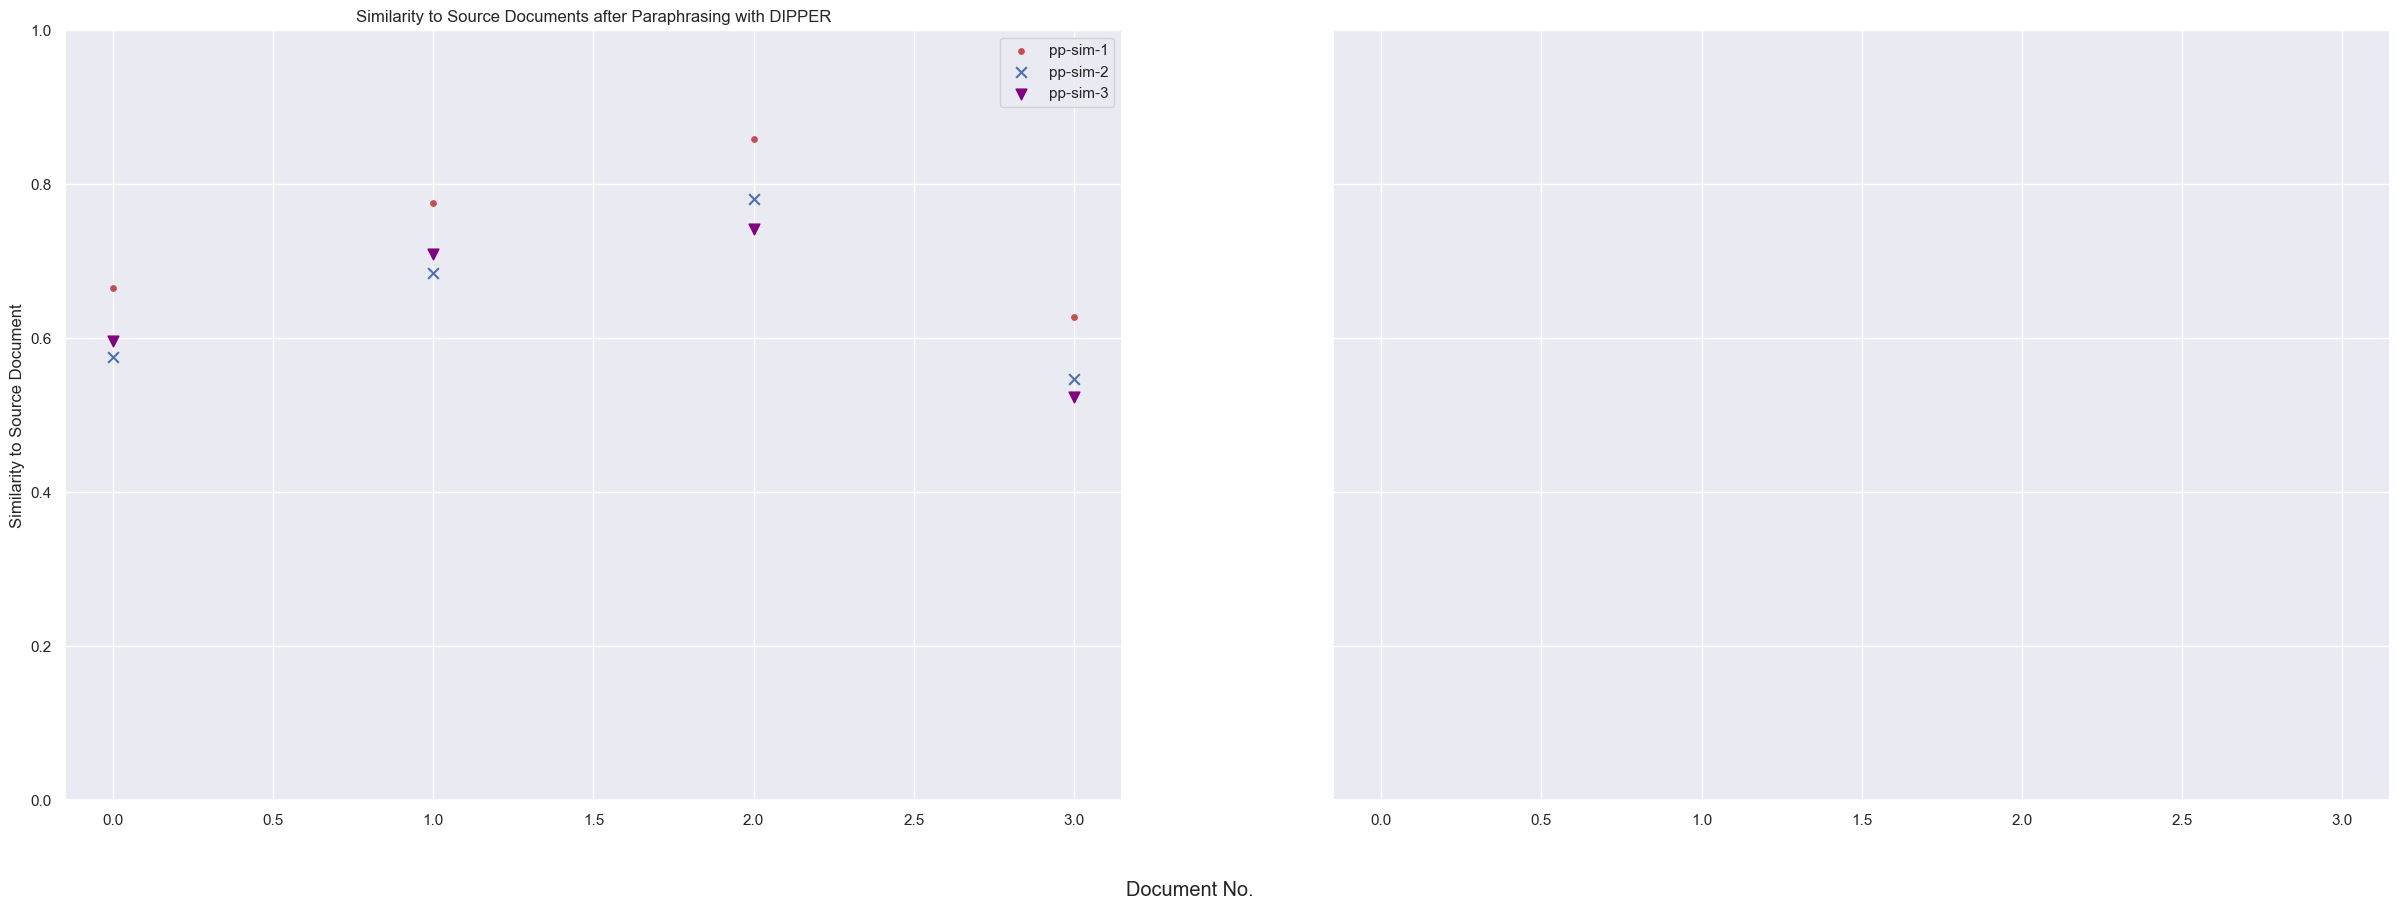

In [16]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(30, 10), sharey=True, sharex=True)

ax1.set_ylim(0, 1)
markers = ['.', 'x', 'v']
colours = ['r', 'b', 'purple']
x_axis = list(range(dipper_df.shape[0]))

for i, col in enumerate(np_dipper.T):
    ax1.scatter(x_axis, col, marker=markers[i], c=colours[i], s=60, label=sim_columns[i])

ax1.set_title("Similarity to Source Documents after Paraphrasing with DIPPER")
ax1.set_ylabel("Similarity to Source Document")
ax1.legend()

# for i, col in enumerate(np_word.T):
#     ax2.scatter(x_axis, col, marker=markers[i], c=colours[i], s=60, label=sim_columns[i])

# ax2.set_title("Similarity to Source Documents after Word Replacement")
# ax2.legend()

fig.supxlabel("Document No.")
# plt.savefig("../results/images/sentence_similarity/mistral-7b-february/paraphrase-similarity-against-word.png", bbox_inches='tight')
plt.show()

# Investigating particularly poor case

### File: 'evaluated/paraphrase_dipper_mistralai_51_similarity_21_02_2024.csv'
For index 25, the third paraphrase is awful. It literally loses like almost all of the text.

In [80]:
bad_case = dipper_df.iloc[25]

In [97]:
base_and_pp_columns = ["kgw-watermarked"] + [f"pp-kgw-{i}" for i in range(1, no_paraphrases+1)]
bad_case[base_and_pp_columns]

Index(['kgw-watermarked', 'pp-kgw-1', 'pp-kgw-2', 'pp-kgw-3'], dtype='object')

In [100]:
def pretty_print_row(row):
    for ind in row.index:
        print(f"{ind}: {row[ind]}")
        print(f"{'-'*30}")

In [101]:
pretty_print_row(bad_case[base_and_pp_columns])

kgw-watermarked:  Title: Occupation vs Inactivity: The Impact on Goals and Productivity in Teenage Life

Staying occupied leads to numerous benefits over inactivity, boosting physical health, cognitive development, and personal growth. Productivity fosters the achievement of long-term goals, as shown by case studies. For instance, 18-year-old Jane became an honor roll student and volunteered weekly at a retirement home, continually improving her mental acuity. In comparison, 19-year-old Jack spent most hours watching TV, leading to sedentary lifestyle and declining focus. Productively engaging in tasks helps teenagers build character, persistence, and the necessary skills to succeed later in life. Conversely, slackness breeds disappointments and missed opportunities. While the path to productivity calls for commitment and overcoming the urge to procrastinate, the long-term benefits outweigh the initial challenges.
------------------------------
pp-kgw-1: Title: Occupation vs Inactivity